In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib

matplotlib.rcParams["figure.figsize"] = (20,10)

In [44]:
df = pd.read_csv(r"C:\Users\chaud\Downloads\archive (19)\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [46]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [47]:
col_s = ["area_type","availability","society","balcony"]
df1 = df.drop(col_s,axis = "columns",errors = "ignore")


In [48]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [49]:
df1.location.value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [50]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [51]:
df2 = df1.dropna()
df2.isnull().sum()
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [52]:
df2.shape

(13246, 5)

In [53]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [54]:
df3 = df2.copy()
df3["BHK"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head(2)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [55]:
df3["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [56]:
df3[df3.BHK > 20]


,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [57]:
print(df3.total_sqft.unique())
#converting in singles value 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [58]:
df3[~df3["total_sqft"].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [59]:
#data is unstructured
def convert_sqft_to_num(x):
    #if isinstance(x, str):
       tokens = x.split("-")
       if len(tokens) == 2:
         return(float(tokens[0]) + float(tokens[1]))/2
       try: 
         return float(x)
       except:
         return None
    

In [60]:
convert_sqft_to_num("2166")

2166.0

In [61]:
print(convert_sqft_to_num("2100 - 2850"))

2475.0


In [62]:
df3["total_sqft"] = df3["total_sqft"].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [63]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [64]:
#feature engineering 
df4 = df3.copy()
df4["price_per_sqft"] = (df4["price"]*100000) /df4["total_sqft"]

In [65]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [66]:
print(df4.location.unique())
print(len(df4.location.unique()))

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
1304


In [120]:
df5 = df4.copy()
location_stats_less_then_10 = location_stats[location_stats <= 10]
location_stats_less_then_10


location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [121]:
#dimensionality problem 
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [122]:
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_less_then_10 else x)
print(df5.head(10))
print(len(df4.location.unique()))
print((df5.location).sort_values(ascending = True))


                   location       size  total_sqft  bath   price  BHK  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.24427

In [123]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [124]:
#outlier detection 
df5[df5.total_sqft /df5.BHK < 300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [125]:
df6 = df5[~(df5.total_sqft /df5.BHK < 300)]
df6.shape

(12502, 7)

In [126]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [127]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
       m = np.mean(subdf.price_per_sqft)
       st = np.std(subdf.price_per_sqft)
       reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
       df_out = pd.concat([df_out,reduced_df],ignore_index = True)

    return df_out
df7 = remove_pps_outliers(df6)


In [128]:
print(df7.shape)
df7.head()

(10241, 7)


,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


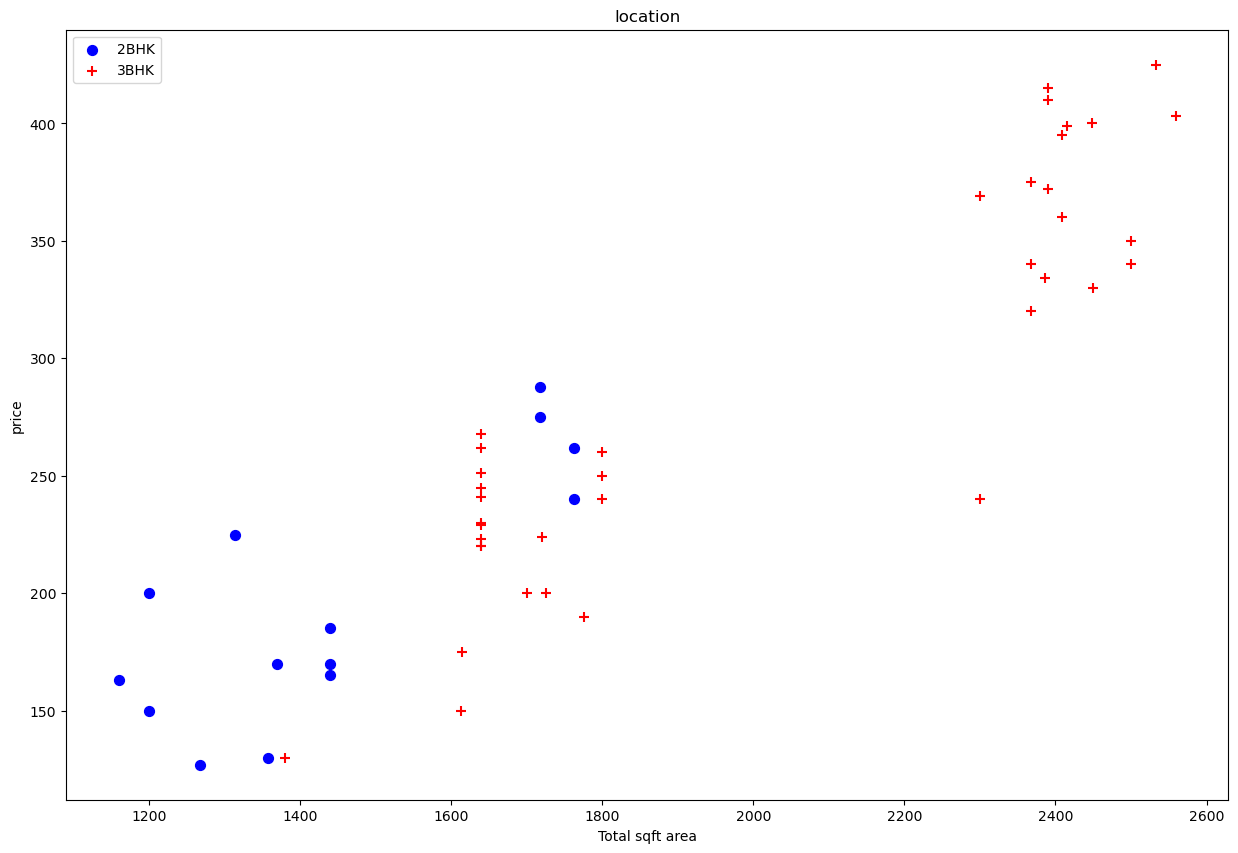

In [129]:
#checking the data which have same "sqft" but different errors 
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location == location) & (df.BHK == 2)]
    BHK3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(BHK2.total_sqft , BHK2.price ,color = "blue",label = "2BHK",s= 50)
    plt.scatter(BHK3.total_sqft , BHK3.price ,color = "red",marker = "+",label = "3BHK",s= 50)
    plt.xlabel("Total sqft area")
    plt.ylabel("price")
    plt.title("location")
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

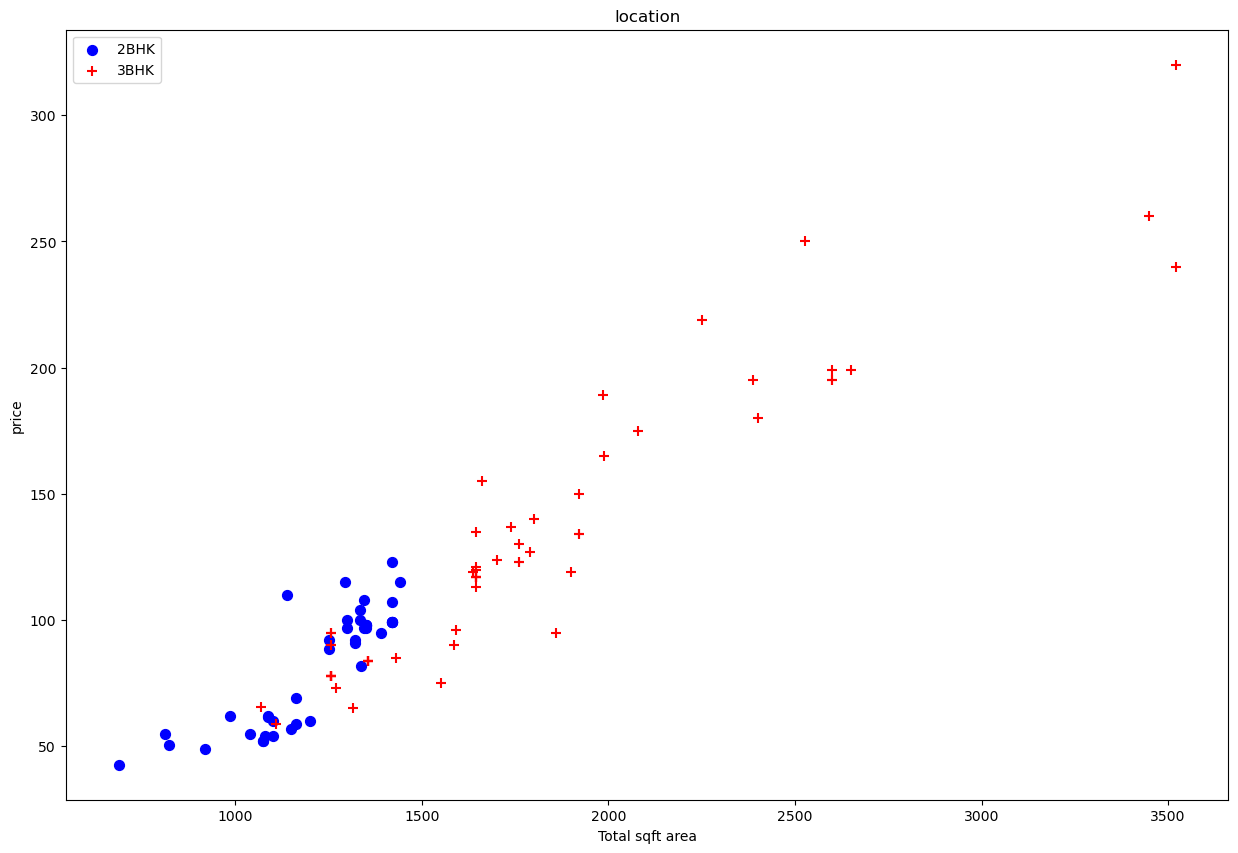

In [130]:

plot_scatter_chart(df7,"Hebbal")

In [131]:
#removing the 2BHK apartments whose price_pere_sqft is less than mean_price_per_sqft 
def remove_BHK_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        BHK_stats = {}
        for BHK,BHK_df in location_df.groupby("BHK"):
            BHK_stats[BHK] = {
                "mean":np.mean(BHK_df.price_per_sqft),
                "std":np.std(BHK_df.price_per_sqft),
                "count":BHK_df.shape[0]
             }
        for BHK,BHk_df in location_df.groupby("BHK"):
            stats = BHK_stats.get(BHK-1)
            if stats and stats["count"]>5:
                exclude_indices = np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft < (stats["mean"])].index.values)
    return df.drop(exclude_indices,axis = "index")        
df8 = remove_BHK_outliers(df7)
df8.shape
        


(9933, 7)

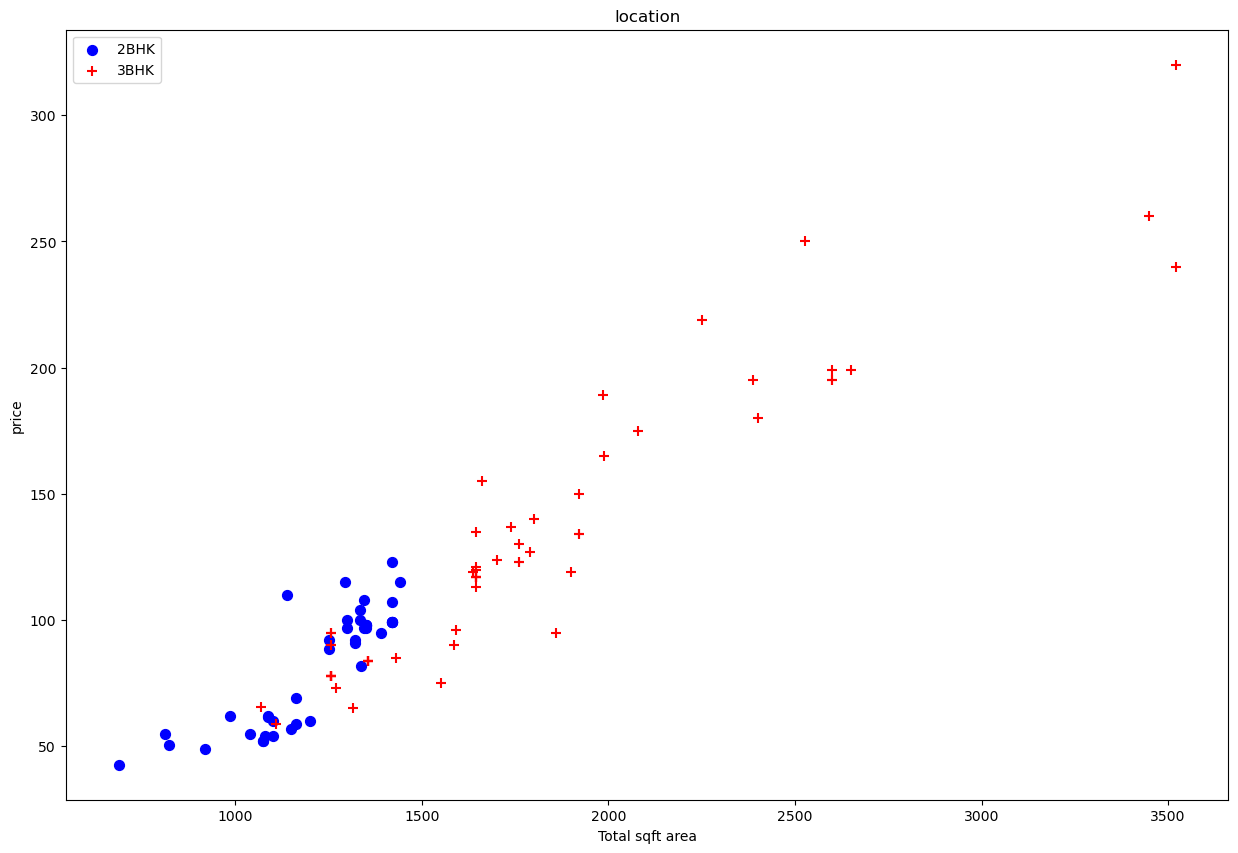

In [132]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

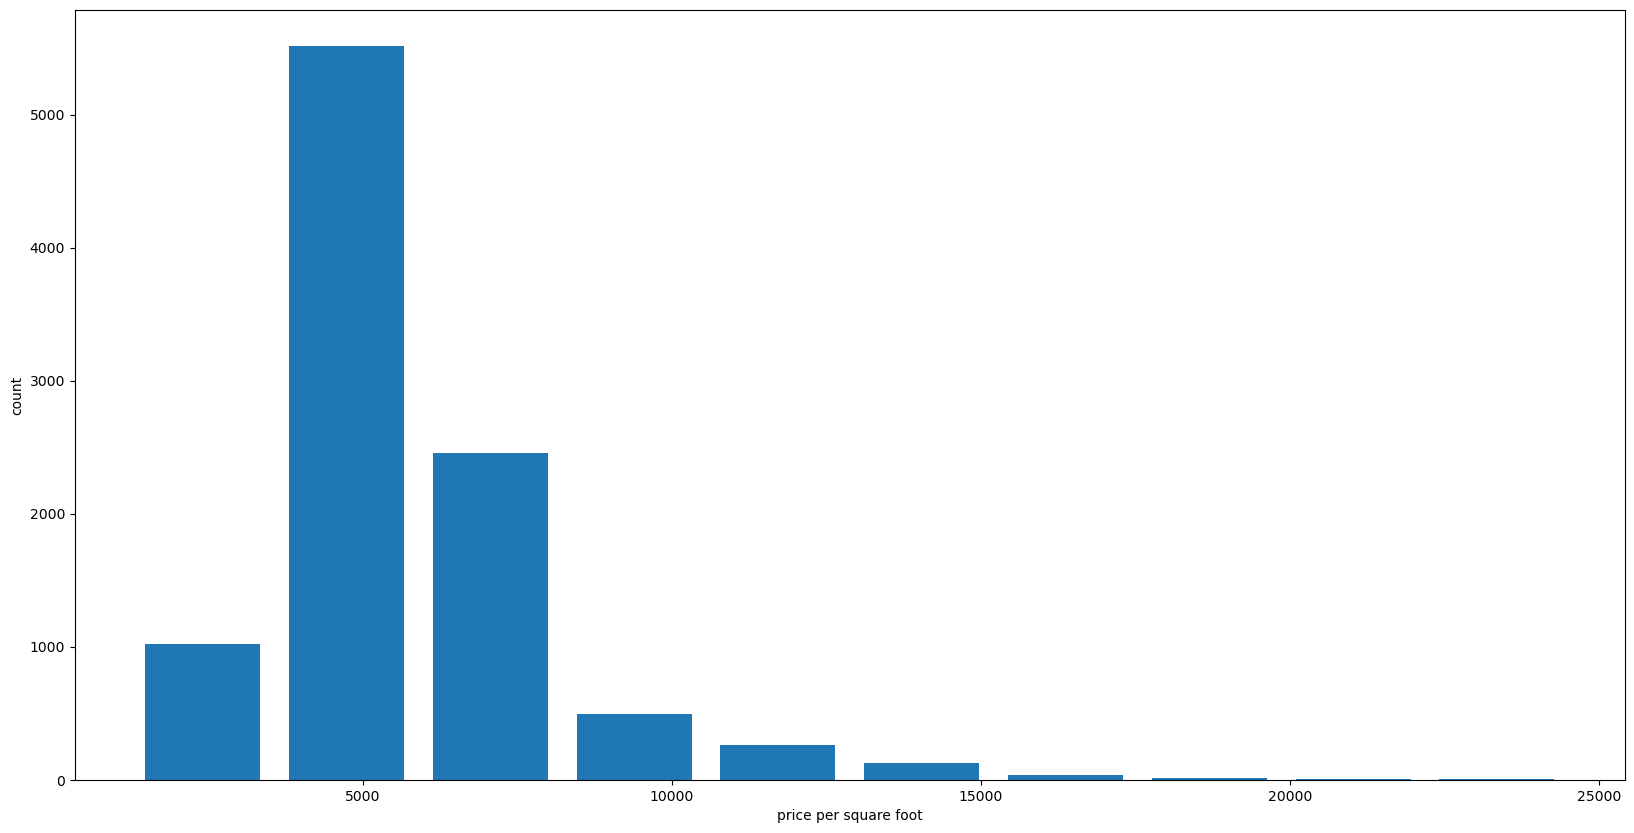

In [133]:
plt.figure(figsize = (20 ,10))
plt.hist(df8.price_per_sqft ,rwidth = 0.8)
plt.xlabel("price per square foot")
plt.ylabel("count")

In [134]:
print(df8.bath.unique())
df8[df8.bath > 10]

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 13.]


,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

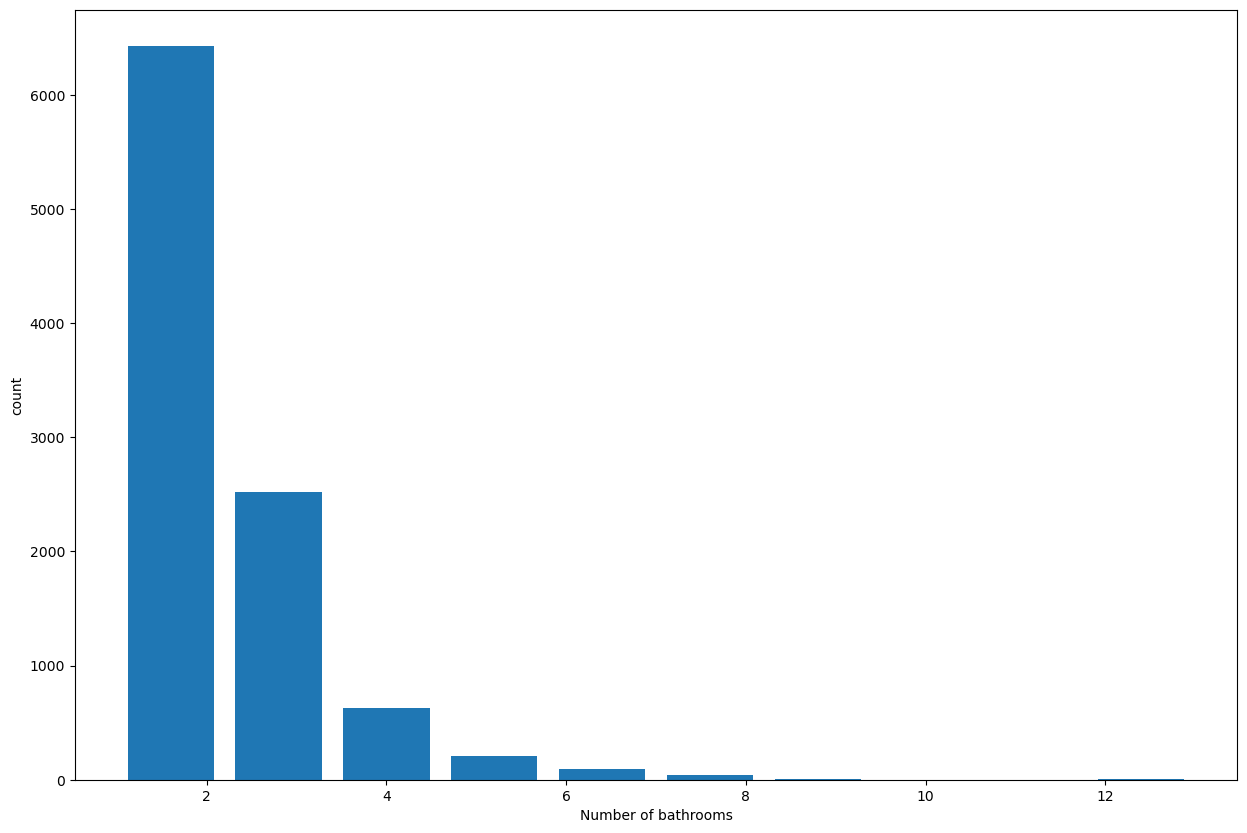

In [135]:
#checking for outliers bathrooms > bedrooms 
plt.hist(df8.bath , rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("count")

In [136]:
df8[df8.bath > df8.BHK + 2]
df8.shape


(9933, 7)

In [137]:
df9 = df8[df8.bath < df8.BHK + 2]
df9.shape

(9844, 7)

In [138]:
df10 = df9.drop(["size","price_per_sqft"],axis = "columns")
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [139]:
dummies = pd.get_dummies(df10.location)
dummies.astype(int)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
if "other" in dummies.columns:
    df11 = pd.concat([df10,dummies.drop(["other"],axis = "columns") ],axis = "columns")
    print("other is not present")
else:
    df11 = pd.concat([df10,dummies.astype(int)],axis = "columns")
    print("other is absent")    

other is not present


In [141]:
df11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [142]:
df12 = df11.drop("location",axis = "columns")
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
x = df12.drop("price",axis = "columns")
x.head()
print(x.shape)

(9844, 244)


In [144]:
y = df12.price
y.head()


0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state= 10)

In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [147]:
lr.score(x_test,y_test)

0.8709456695262296

In [148]:
#using cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5,test_size= 0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv= cv)

array([0.79642245, 0.85528504, 0.79682878, 0.82618948, 0.73561209])

In [149]:
#using gridsearch 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


def find_best_model_using_gridsearchcv(x,y):
    algo ={
        "linear_regression":{
            "model":make_pipeline(StandardScaler() ,LinearRegression()),
            "params":{
                "standardscaler__with_mean": [True, False]
            }
        },
        "lasso":{
            "model":Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random","cyclic"]
            }
        },
        "decision_tree":{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":["mse","friedman_mse"],
                "splitter":["best","random"]
            }
        }
    }
    scores = []
    cv= ShuffleSplit(n_splits = 5,test_size = 0.2,random_state=0)
    for algo_name,config in algo.items():
        gs = GridSearchCV(config["model"],config["params"],cv=cv,return_train_score = False)
        gs.fit(x,y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params
            })
    return pd.Dataframe(scores,columns = ["model","best_score","best_params"])    
    find_best_model_using_gridsearchcv(x,y)



In [152]:
import numpy as np
def predict_price(location,sqft,bath,BHK):
    loc_index = np.where(x.columns == location)[0][0]
    x_array = np.zeros(len(x.columns))
    x_array[0] = sqft
    x_array[1] = bath 
    x_array[2] = BHK
    if loc_index >= 0:
        x_array[loc_index] = 1
    return lr.predict([x_array])[0] 

print(predict_price("1st Phase JP Nagar",1000,2,2))
print(predict_price("1st Phase JP Nagar",1000,3,3))
print(predict_price("2nd Stage Nagarbhavi",1000,2,2))      
    



90.41663616702255
91.39963097409981
188.05046922884694


C:\Users\chaud\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\chaud\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\chaud\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [156]:
import pickle
with open("bangalore.pickle","wb")as f:
    pickle.dump(lr,f)
import json
columns = {"data_columns":[col.lower() for col in x.columns]}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))    

In [159]:
import pickle
import os

# Saving the pickle file
file_path = "bangalore.pickle"
with open(file_path, "wb") as f:
    pickle.dump(lr, f)

# Get the absolute path of the file
absolute_path = os.path.abspath(file_path)

# Get the directory of the file
directory = os.path.dirname(absolute_path)

print("Directory of the pickle file:", directory)


Directory of the pickle file: c:\Users\chaud
